___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# AutoEncoders for Dimensionality Reduction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,
    n_features=2,
    centers=2,
    cluster_std=1.0,random_state=101)

In [4]:
X,y = data

In [5]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [6]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']

In [7]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


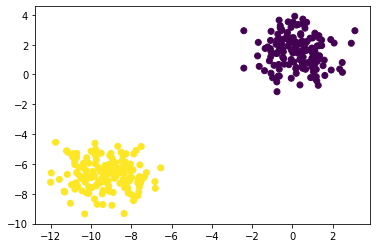

In [8]:
plt.scatter(feat['X1'],feat['X2'],c=y)

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# %matplotlib notebook

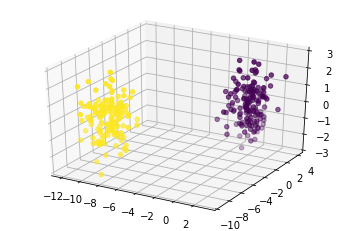

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

# Encoder and Decoder

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [13]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [14]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [15]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Note how all the data is used! There is no "right" answer here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [18]:
# scaled_data

In [19]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1848
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1545
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1463
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1440
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.1383


In [20]:
encoded_2dim = encoder.predict(scaled_data)

In [21]:
encoded_2dim

array([[0.9355453 , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.6460165 , 0.        ],
       [0.78085315, 0.        ],
       [0.5939837 , 0.        ],
       [0.        , 0.        ],
       [0.7384761 , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.6444338 , 0.        ],
       [0.6041736 , 0.        ],
       [0.        , 0.        ],
       [0.4486765 , 0.        ],
       [0.        , 0.        ],
       [0.65185887, 0.        ],
       [0.        , 0.        ],
       [0.12514439, 0.        ],
       [0.2846303 , 0.        ],
       [0.        , 0.        ],
       [0.6967484 , 0.        ],
       [0.07280588, 0.        ],
       [0.        , 0.        ],
       [0.47198012, 0.        ],
       [0.70871806, 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.734655  , 0.        ],
       [0.689668  , 0.        ],
       [0.

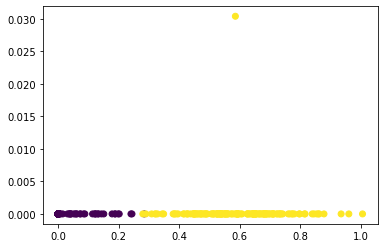

In [22]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)